In [1]:
import pandas as pd
import numpy as np
import datetime
import time

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# knowing the data

In [3]:
events_df = pd.read_csv('events.csv')
events_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [4]:
events_df.keys()

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid'], dtype='object')

In [5]:
events_df['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [6]:
events_df[events_df.transactionid.notnull()].visitorid.unique()    

array([ 599528,  121688,  552148, ..., 1155978, 1050575,  855941])

visitorid of thoes visitors who made transactions 

In [7]:
events_df[events_df.transactionid.notnull()].event.unique()

array(['transaction'], dtype=object)

'transaction' is recorded in event, whenever transactionid(purchase) is created

In [8]:
category_df = pd.read_csv('category_tree.csv')

In [9]:
category_df

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


Categoryid explain the relationship of different products with each other, like categoryid 1016 is a child of parentid 213.

In [10]:
item_properties_1_df = pd.read_csv('item_properties_part1.csv')

In [11]:
item_properties_1_df

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566


timestamp is still the same Unix format.

itemid is the unique item identifier.

Property is the Item's attributes such as category id and availability while the rest are hashed for confidentiality purposes.

Value is the item's property value like availability(one of the properties) is 1 if there is stock and 0 otherwise.

In [12]:
item_properties_1_df.loc[(item_properties_1_df.property == 'categoryid') & (item_properties_1_df.value == '618')].sort_values('timestamp').head()

,timestamp,itemid,property,value
8582420,1431226800000,123973,categoryid,618
4818247,1431226800000,413487,categoryid,618
2842000,1431226800000,268139,categoryid,618
9943275,1431226800000,146905,categoryid,618
5769012,1431226800000,451095,categoryid,618


above is the number of items under category id 618.

# Customer Behaviour Exploration
Its good to categorise coustomers in (a) how made transactions, (b) thoes who do not made transaxtion.

In [13]:
# all customers who made transaction.
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()

In [14]:
len(customer_purchased)

11719

these many visitors made purchases.

and their unique 'visitorid' is stored in customer_purchased

In [15]:
all_customers = events_df.visitorid.unique()

In [16]:
len(all_customers)
#all the visitors of the item.

1407580

In [17]:
customer_browsed = [x for x in all_customers if x not in customer_purchased]  # this code takes time

In [18]:
type(customer_browsed),len(customer_browsed)

(list, 1395861)

In [19]:
customer_browsed = np.isin(all_customers,customer_purchased)  

# another way of doing this.
#customer_browsed = np.array(list(set(all_customers)- set(customer_purchased)))  


# both these codes save time, 

In [20]:
len(customer_browsed)

1407580

these many customers have visited the item, but did not purchaced it.

REMEMBER: CUSTOMER_PURCHASED, CUSTOMER_BROWSED, ALL_CUSTOMERS.  ALL CONTAIN UNIQUE 'visitorid', in numpy array

# Below is a snapshot of visitor id 599528 and their buying journey from viewing to transaction (purchase)

In [21]:
customer_history = events_df[events_df.visitorid == 599528].sort_values('timestamp')
customer_history

,timestamp,visitorid,event,itemid,transactionid
16729,1433221896102,599528,view,356475,NaN
112,1433221941632,599528,addtocart,356475,NaN
130,1433222276276,599528,transaction,356475,4000.0
29505,1433297545235,599528,view,356475,NaN
114163,1433625010602,599528,view,356475,NaN
145498,1433731497480,599528,view,356475,NaN
187497,1433896449376,599528,view,356475,NaN
171995,1433896477794,599528,view,356475,NaN
197272,1433960259198,599528,view,356475,NaN
192471,1433960567121,599528,view,356475,NaN



Now, that we know about customer_purchased lets find out which items they purchased.


In [22]:
purchased_items =[]
for customer in customer_purchased:
    purchased_items.append(list(events_df.loc[(events_df.visitorid == customer) & (events_df.transactionid.notnull())].itemid.unique()))

purchased_items is a list which contain itemid of purchased items.

In [23]:
len(purchased_items)

11719

In [24]:
purchased_items[100:150]

[[329522],
 [164885],
 [384399],
 [385201],
 [315543],
 [1684],
 [19883],
 [288418],
 [379092],
 [243470],
 [189444],
 [190260],
 [78822, 251415],
 [115530],
 [102573],
 [821],
 [431447],
 [317435],
 [181202],
 [231565],
 [217218, 8641, 32227, 331159],
 [339808],
 [312728,
  353436,
  156552,
  179290,
  182157,
  31058,
  389200,
  152262,
  98425,
  331644,
  454183],
 [448494],
 [199348],
 [118024, 305742, 113641, 275344],
 [281480, 271268, 102408, 358731, 445813, 283037],
 [43485],
 [189764],
 [243980],
 [248614],
 [120098, 34269, 85771, 451501, 7574, 433543, 79801, 291964],
 [127722, 62800, 8641, 185211, 273747, 406121, 403477, 73377, 38437, 340327],
 [52539, 206218, 156767],
 [306328, 249161, 194643],
 [157438, 193554, 428040],
 [8724],
 [219821, 329443],
 [6364,
  331159,
  150889,
  273555,
  406071,
  160272,
  276282,
  100188,
  77844,
  255908,
  388800,
  259710,
  99003,
  252400,
  58123],
 [316753],
 [7943],
 [336359],
 [151471],
 [383396],
 [158575],
 [114121,
  382649

above data is given in the form of list of lists.

The inner lists are collection of itemid purchased by single costumer(possibly on different dates).

This inner list of items can be used to suggest visitors("thoes who buy this also buy following"). Provided the visitor buy any one item from this inner list.

In [25]:
# As purchase is made 'itemid' is pass through this function along with purchased_items(which is calculated above)
def recommender_bought_bought(item_id, purchased_items):
    recommender_list = []
    for x in purchased_items:        # x(inner_list) is a purchased item
        if item_id in x:             # purchased item is in x(inner_list)
            recommender_list += x
    recommender_list = list(set(recommender_list) - set([item_id]))
    
    return recommender_list

In [26]:
# Check: recommender_bought_bought()
recommender_bought_bought(194643, purchased_items)

[330506,
 100108,
 243218,
 357650,
 213785,
 90910,
 73760,
 41763,
 133157,
 226092,
 375854,
 165169,
 296756,
 269110,
 132156,
 136766,
 122435,
 434247,
 249161,
 263245,
 134992,
 45393,
 409426,
 420960,
 117096,
 279656,
 49257,
 265326,
 136053,
 53113,
 401529,
 355707,
 198784,
 75392,
 102020,
 8070,
 188550,
 275339,
 139918,
 132246,
 306328,
 384157,
 60317,
 241826,
 165282,
 353965,
 335536,
 350384,
 290999,
 119736,
 206527,
 25025,
 293576,
 105933,
 438484,
 181462,
 60888,
 275677,
 308704,
 430050,
 389860,
 176869,
 162024,
 116974,
 453618,
 351481,
 211451]

So now we can present to the visitor a list of the other items a customer previously bought along with what item the current visitor is viewing e.g. item number 302422

In [27]:
recommender_bought_bought(217218, purchased_items)    # itemid = '217218'

[8641, 32227, 331159]

In [28]:
recommender_bought_bought(428040, purchased_items)     # itemid = '428040'

[193554, 157438]

In [29]:
recommender_bought_bought(321984, purchased_items)     # itemid = '321984'

[48115]

In [30]:
recommender_bought_bought(291964, purchased_items)     # itemid = '291964'

[450565,
 79877,
 215051,
 323599,
 325652,
 67614,
 172063,
 352290,
 428067,
 299044,
 210984,
 251945,
 262186,
 268336,
 225329,
 106547,
 38965,
 272438,
 415810,
 438338,
 450641,
 137305,
 75873,
 258148,
 464998,
 176231,
 153708,
 213102,
 319602,
 436344,
 118914,
 161925,
 413834,
 438412,
 376974,
 256146,
 368788,
 254101,
 315543,
 8347,
 71836,
 239774,
 260256,
 454818,
 448690,
 100532,
 377018,
 104634,
 270525,
 18626,
 98498,
 37068,
 409804,
 276704,
 47334,
 202983,
 116968,
 57577,
 166122,
 176363,
 139515,
 432391,
 61705,
 182539,
 241940,
 170262,
 354585,
 461093,
 370984,
 151848,
 319797,
 266553,
 268604,
 391484,
 444741,
 373064,
 246090,
 41295,
 254290,
 188754,
 457045,
 57686,
 282966,
 4442,
 235880,
 383341,
 170353,
 199026,
 242035,
 299384,
 219512,
 31098,
 352634,
 360825,
 186745,
 344446,
 360831,
 37254,
 450950,
 108936,
 27020,
 22926,
 65941,
 219550,
 104864,
 166306,
 192931,
 8612,
 168358,
 360877,
 221614,
 184756,
 4537,
 57788,
 

In [31]:
recommender_bought_bought(85771, purchased_items)     # itemid = '85771'

[449220,
 433543,
 273872,
 256146,
 336405,
 7574,
 34269,
 172894,
 120098,
 86691,
 4067,
 380971,
 451501,
 412333,
 271405,
 123448,
 79801,
 291964,
 15358,
 277183]

In [32]:
all_visitors = events_df.visitorid.sort_values().unique()
all_visitors.size

1407580

In [33]:
buying_visitors = events_df[events_df.event == 'transaction'].visitorid.sort_values().unique()
buying_visitors.size

11719

In [34]:
viewing_visitors_list = list(set(all_visitors) - set(buying_visitors))

In [35]:
def create_dataframe(visitor_list):
    
    array_for_df = []
    for v_id in visitor_list:

        #Create that visitor's dataframe once
        v_df = events_df[events_df.visitorid == v_id]

        temp = []
        #Add the visitor id
        temp.append(v_id)

        #Add the total number of unique products viewed
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.event == 'view'].event.count())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)

        #Then put either a zero or one if they made a purchase
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)
    
    return pd.DataFrame(array_for_df, columns=['visitorid', 'num_items_viewed', 'view_count', 'bought_count', 'purchased'])

In [36]:
buying_visitors_df = create_dataframe(buying_visitors)
#buying_visitors_df = create_dataframe(buying_visitors)

In [37]:
buying_visitors_df

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,172,22,33,2,1
1,186,1,2,1,1
2,264,2,3,2,1
3,419,3,4,1,1
4,539,1,4,1,1
...,...,...,...,...,...
11714,1406787,3,20,1,1
11715,1406981,4,4,1,1
11716,1407070,1,1,1,1
11717,1407110,2,7,1,1


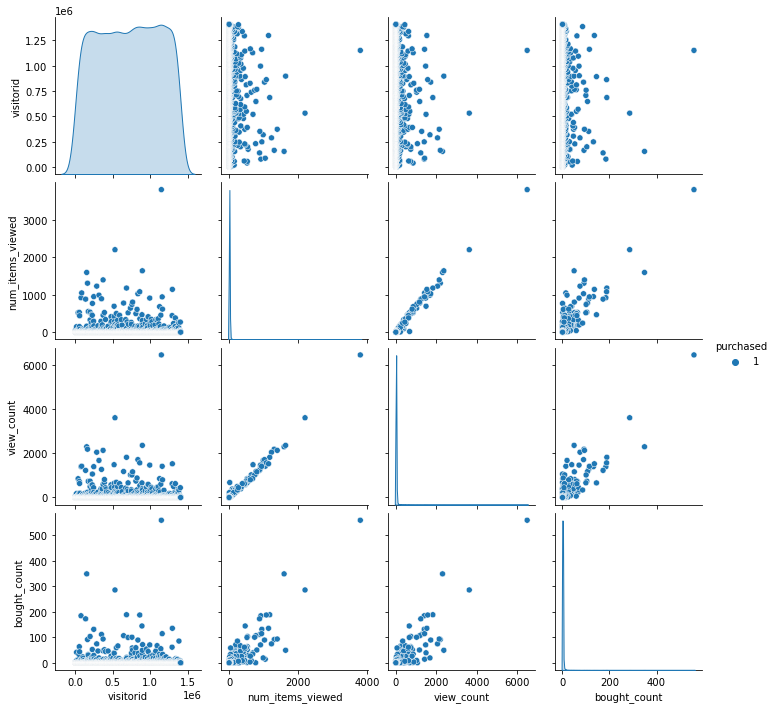

In [38]:
sns.pairplot(buying_visitors_df,hue ='purchased')

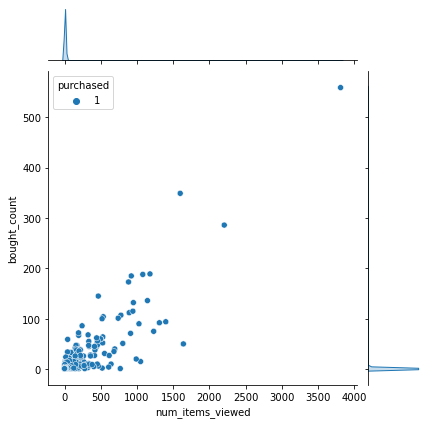

In [39]:
sns.jointplot(x = 'num_items_viewed',y = 'bought_count', data= buying_visitors_df,hue ='purchased')

In [40]:
viewing_visitors_df = create_dataframe(viewing_visitors_list[0:27820])
viewing_visitors_df

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,0,3,3,0,0
1,1,1,1,0,0
2,2,4,8,0,0
3,3,1,1,0,0
4,4,1,1,0,0
...,...,...,...,...,...
27815,28028,1,1,0,0
27816,28029,1,1,0,0
27817,28030,3,3,0,0
27818,28031,1,1,0,0


In [41]:
buying_visitors_df

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,172,22,33,2,1
1,186,1,2,1,1
2,264,2,3,2,1
3,419,3,4,1,1
4,539,1,4,1,1
...,...,...,...,...,...
11714,1406787,3,20,1,1
11715,1406981,4,4,1,1
11716,1407070,1,1,1,1
11717,1407110,2,7,1,1


In [42]:
final_df = pd.concat([viewing_visitors_df,buying_visitors_df],ignore_index= True)

/home/prince_singh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


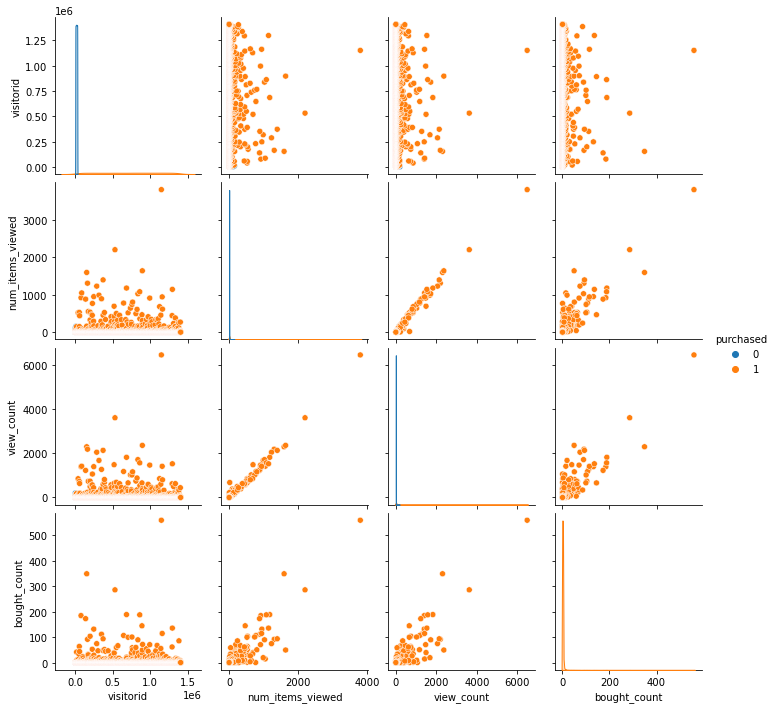

In [43]:
sns.pairplot(final_df,hue= 'purchased')

In [44]:
final_df.head()

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,0,3,3,0,0
1,1,1,1,0,0
2,2,4,8,0,0
3,3,1,1,0,0
4,4,1,1,0,0


In [45]:
final_df.iloc[-1]

visitorid           1407398
num_items_viewed          0
view_count                0
bought_count              1
purchased                 1
Name: 39538, dtype: int64

In [46]:
X = final_df.drop(columns = ['purchased', 'visitorid', 'bought_count'])
y = final_df.purchased


In [47]:
X.head()

,num_items_viewed,view_count
0,3,3
1,1,1
2,4,8
3,1,1
4,1,1


In [48]:
y

0        0
1        0
2        0
3        0
4        0
        ..
39534    1
39535    1
39536    1
39537    1
39538    1
Name: purchased, Length: 39539, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [52]:
logreg =LogisticRegression()


In [53]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [54]:
predictions = logreg.predict(X_test)

In [55]:
mse = metrics.mean_squared_error(predictions,y_test)
rmse = np.sqrt(mse)
print('ROOT MEAN SQUARED ERROR: {}'.format(rmse))

ROOT MEAN SQUARED ERROR: 0.45205091006527653


In [56]:
metrics.accuracy_score(y_test, predictions)

0.7956499747091553

# model (logreg), gives 79.56% correct predictions

In [57]:
logreg.score(X_test, y_test)

0.7956499747091553

In [58]:
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [59]:
X_test

,num_items_viewed,view_count
25423,1,1
7672,3,3
33858,1,3
8156,1,1
5179,1,1
...,...,...
32244,3,6
1302,2,2
38271,11,17
4964,1,1


In [64]:

new_test= pd.DataFrame( columns=['num_items_viewed','view_count'])
new_test.loc[0] = [2, 1]

In [65]:
logreg.predict(new_test)

array([0])